In [1]:
import os
import joblib
import pickle

import pandas as pd
import numpy as np

pd.options.display.max_rows = 100

In [2]:
artifacts_fpath = '/labs/shahlab/projects/lguo/temp_ds_shift_robustness/clmbr/experiments/clmbr/adapter_artifacts'

## MODEL PERFORMANCE AND ROBUSTNESS

In [3]:
y_axis = {
    'auc':{
        'hospital_mortality':{'lim':[-0.05, 0.05]},
        'LOS_7':{'lim':[-0.1, 0.02]},
        'readmission_30':{'lim':[-0.1, 0.02]},
        'icu_admission':{'lim':[-0.1, 0.02]},
        'label':'AUROC'
    },
    'auprc':{
        'hospital_mortality':{'lim':[-0.15, 0.15]},
        'LOS_7':{'lim':[-0.15, 0.05]},
        'readmission_30':{'lim':[-0.15, 0.05]},
        'icu_admission':{'lim':[-0.15, 0.15]},
        'label':'AUPRC'
    },
    'auprc_c':{
        'hospital_mortality':{'lim':[-0.15, 0.15]},
        'LOS_7':{'lim':[-0.15, 0.05]},
        'readmission_30':{'lim':[-0.15, 0.05]},
        'icu_admission':{'lim':[-0.15, 0.15]},
        'label':'AUPRC_C'
    },
    'ace_abs_logistic_logit':{
        'hospital_mortality':{'lim':[-0.02, 0.02]},
        'LOS_7':{'lim':[-0.02, 0.05]},
        'readmission_30':{'lim':[-0.02, 0.05]},
        'icu_admission':{'lim':[-0.02, 0.05]},
        'label':'Calibration'
    },
}

metrics = {
    'auc':'AUROC',
    'auprc':'AUPRC',
    'auprc_c':'AUPRC_C',
    'ace_abs_logistic_logit':'Calibration',
}

models = {
    'lr':'Logistic Regression',
    'gbm':'LightGBM'
}

encoders = {
    'gru':'GRU',
    'transformer':'Transformer',
}

tasks = {
    'hospital_mortality':'In-Hospital Mortality',
    'LOS_7':'LOS > 7 Days',
    'readmission_30':'Readmission in 30 Days',
    'icu_admission':'Admission to ICU'
}

train_years = {
    '2009_2010_2011_2012':'09-12',
}

#### ID Performance

In [4]:
from utils_visualize import get_result_table

df = get_result_table(artifacts_fpath,train_years,tasks,metrics,models,encoders)
print("ID Performance of LR Models Trained on 09-12")
display(df)

ID Performance of LR Models Trained on 09-12


Train Group                                        09-12  \
Encoder                                              GRU   
Model                                Logistic Regression   
Task                   Metric                              
In-Hospital Mortality  AUROC         0.957 (0.94, 0.969)   
                       AUPRC          0.477 (0.4, 0.551)   
                       Calibration  0.002 (0.001, 0.004)   
LOS > 7 Days           AUROC        0.883 (0.874, 0.892)   
                       AUPRC         0.688 (0.665, 0.71)   
                       Calibration  0.009 (0.004, 0.014)   
Readmission in 30 Days AUROC        0.795 (0.773, 0.817)   
                       AUPRC        0.251 (0.216, 0.291)   
                       Calibration  0.004 (0.001, 0.008)   
Admission to ICU       AUROC        0.945 (0.927, 0.959)   
                       AUPRC        0.366 (0.295, 0.442)   
                       Calibration    0.002 (0.0, 0.004)   

Train Group                                               \
Encoder                                                    
Model                                           LightGBM   
Task                   Metric                              
In-Hospital Mortality  AUROC        0.956 (0.943, 0.967)   
                       AUPRC        0.471 (0.397, 0.546)   
                       Calibration  0.008 (0.006, 0.011)   
LOS > 7 Days           AUROC        0.891 (0.883, 0.899)   
                       AUPRC        0.714 (0.692, 0.736)   
                       Calibration  0.015 (0.008, 0.021)   
Readmission in 30 Days AUROC        0.799 (0.778, 0.821)   
                       AUPRC        0.267 (0.228, 0.308)   
                       Calibration   0.01 (0.006, 0.014)   
Admission to ICU       AUROC         0.938 (0.92, 0.952)   
                       AUPRC        0.348 (0.276, 0.424)   
                       Calibration   0.01 (0.007, 0.012)   

Train Group                                                                     
Encoder                                      Transformer                        
Model                                Logistic Regression              LightGBM  
Task                   Metric                                                   
In-Hospital Mortality  AUROC        0.945 (0.928, 0.959)  0.939 (0.921, 0.953)  
                       AUPRC        0.362 (0.292, 0.436)  0.372 (0.308, 0.442)  
                       Calibration    0.001 (0.0, 0.003)  0.007 (0.004, 0.009)  
LOS > 7 Days           AUROC          0.86 (0.851, 0.87)   0.861 (0.851, 0.87)  
                       AUPRC        0.625 (0.601, 0.651)  0.632 (0.609, 0.656)  
                       Calibration  0.004 (0.001, 0.009)  0.008 (0.002, 0.015)  
Readmission in 30 Days AUROC        0.796 (0.774, 0.816)  0.793 (0.772, 0.814)  
                       AUPRC         0.25 (0.213, 0.289)  0.249 (0.213, 0.288)  
                       Calibration  0.004 (0.001, 0.009)  0.011 (0.007, 0.015)  
Admission to ICU       AUROC        0.929 (0.908, 0.947)  0.921 (0.897, 0.941)  
                       AUPRC         0.308 (0.24, 0.378)   0.297 (0.239, 0.37)  
                       Calibration    0.002 (0.0, 0.004)  0.009 (0.006, 0.012)

#### Change in OOD performance relative to ID Performance 

    Change in OOD performance of models relative to ID performance of models trained on 09-12


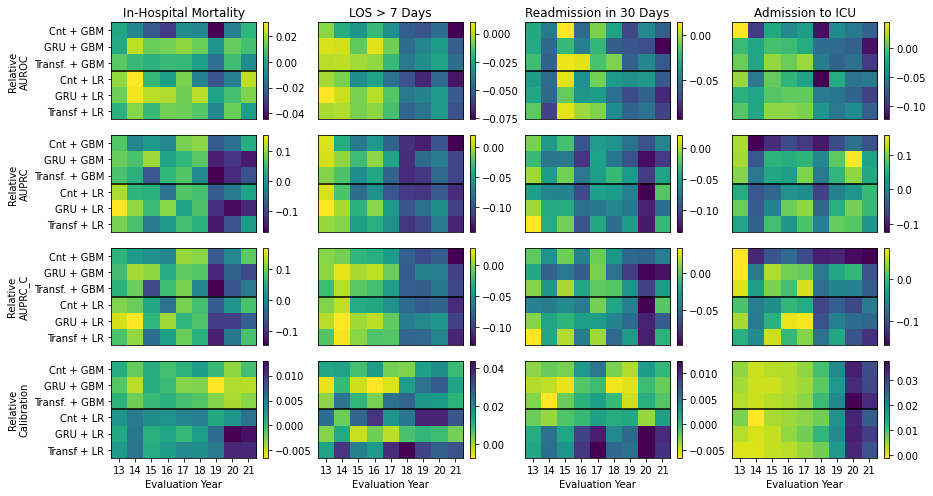

In [8]:
from utils_visualize import plot_heatmap_ood

models_dict = {
    "gru_lr": {
        'label':'GRU + LR',
    },
    "transformer_lr": {
        'label':'Transf + LR',
    },
    "count_lr": {
        'label':'Cnt + LR',
    },
    "gru_gbm": {
        'label':'GRU + GBM',
    },
    "transformer_gbm": {
        'label':'Transf. + GBM',
    },
    "count_gbm": {
        'label':'Cnt + GBM',
    },
} 

print("\
    Change in OOD performance of models relative to ID performance of models trained on 09-12\
")

plot_heatmap_ood(
    artifacts_fpath=artifacts_fpath,
    tasks=tasks,
    encoders=encoders,
    models=models,
    metrics=metrics,
    figsize=(13,7),
    y_axis='auto',
    cmap='viridis',
    models_dict=models_dict,
    save_path='figs/rel_ood_heatmap.png',
)

#### The integral of Relative OOD Performance (2013-2021) of CLMBR and Count feature models
- Models trained on CLMBR features show improved robustness in discrimination performance for Long LOS and ICU admission predictions, but sometimes reduced robustness in calibration performance

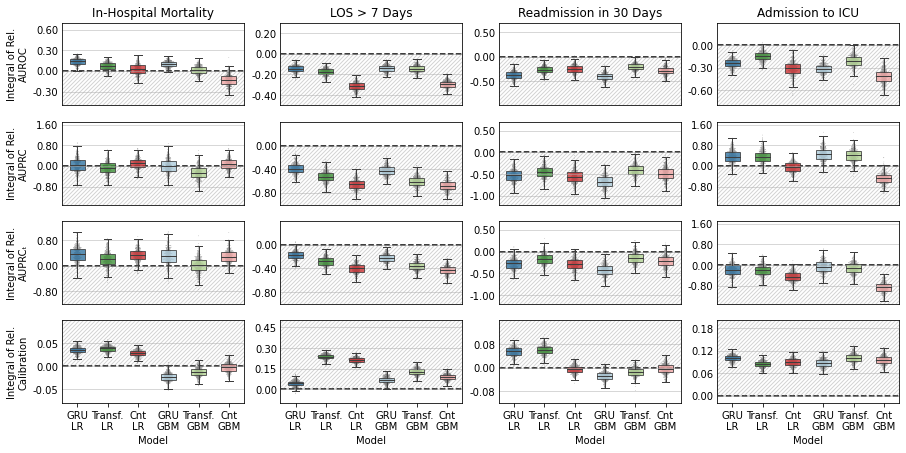

In [10]:
from utils_visualize import plot_change_rel_ood_int
import seaborn as sns

models_dict = {
    "gru_lr": {
        'label':'GRU\nLR',
        'colour':sns.color_palette("Paired")[1],
    },
    "transformer_lr": {
        'label':'Transf.\nLR',
        'colour':sns.color_palette("Paired")[3],
    },
    "count_lr": {
        'label':'Cnt\nLR',
        'colour':sns.color_palette("Paired")[5],
    },
    "gru_gbm": {
        'label':'GRU\nGBM',
        'colour':sns.color_palette("Paired")[0],
    },
    "transformer_gbm": {
        'label':'Transf.\nGBM',
        'colour':sns.color_palette("Paired")[2],
    },
    "count_gbm": {
        'label':'Cnt\nGBM',
        'colour':sns.color_palette("Paired")[4],
    },
} 

y_axis = {
    'auc':{
        'hospital_mortality':[-0.5, 0.7],
        'LOS_7':[-0.5, 0.3],
        'readmission_30':[-1, 0.7],
        'icu_admission':[-0.8, 0.3],
        'label':'AUROC'
    },
    'auprc':{
        'hospital_mortality':[-1.5, 1.7],
        'LOS_7':[-1, 0.4],
        'readmission_30':[-1.2, 0.7],
        'icu_admission':[-1.5, 1.7],
        'label':'AUPRC'
    },
    'auprc_c':{
        'hospital_mortality':[-1.2, 1.4],
        'LOS_7':[-1, 0.4],
        'readmission_30':[-1.2, 0.7],
        'icu_admission':[-1.5, 1.7],
        'label':'AUPRC\u209C'
    },
    'ace_abs_logistic_logit':{
        'hospital_mortality':[-0.08, 0.1],
        'LOS_7':[-0.1, 0.5],
        'readmission_30':[-0.12, 0.16],
        'icu_admission':[-0.02, 0.2],
        'label':'Calibration'
    },
}

results = plot_change_rel_ood_int(
    artifacts_fpath=artifacts_fpath,
    tasks=tasks,
    metrics=metrics,
    models=models,
    encoders=encoders,
    model_colours=models_dict,
    y_axis=y_axis,
    figsize=(15,7),
    legend_bbox_to_anchor=(-0.5,-0.5),
    hatch_alpha=0.35,
    add_swarmplot=True,
    swarmplot_size=.5,
    swarmplot_sample_frac=.5,
    save_path='figs/Rel_OOD_Integral.png'
)

#### Shift in the CDF of predicted risk